<a href="https://colab.research.google.com/github/NagatoARS/Works_Stats_Python_Course/blob/main/%D0%94%D0%B7_%D0%BF%D0%BE_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('water.csv')
df = df[ ['location', 'town', 'hardness', 'mortality'] ]
df

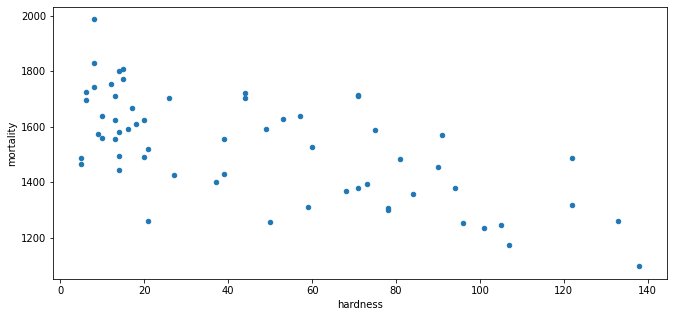

In [ ]:
df.plot(kind="scatter",
        x="hardness",
        y="mortality",
        title="")
#По графику можно заметить, что между показателями смертности населения и жесткости воды существует обратная линейная связь. То есть, чем меньше жесткость воды, тем больше смертей.

In [ ]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)# обучается на данных и подбирает оптимальные коэффициенты

array([-3.31576799])

In [ ]:
model.coef_

array([-3.31576799])

In [ ]:
model.intercept_

1678.9405326885008

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [ ]:
#Сравнение прогноза и факта
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1330.784894,1247
5,10,1645.782853,1558
46,14,1632.519781,1495
31,44,1533.046741,1702
13,78,1420.310629,1307
55,20,1612.625173,1625
34,133,1237.943390,1259
49,75,1430.257933,1587
12,21,1609.309405,1519
40,6,1659.045925,1696


In [ ]:
model.score(X_test, y_test) # значение коэффициента детерминации

0.410213439338294

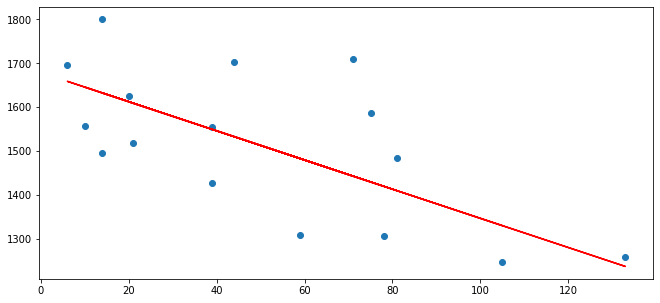

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

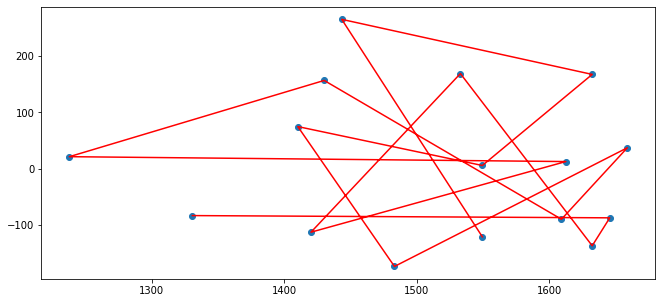

In [ ]:
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')
# Остатки.В графике наблюдается хаотичность движений. Таким образом, модель нормальная и не ошибается.

In [ ]:
south = df[df['location'] == 'South']
south.head()

,location,town,hardness,mortality
0,South,Bath,105,1247
2,South,Birmingham,5,1466
7,South,Bournemouth,78,1299
9,South,Brighton,84,1359
10,South,Bristol,73,1392


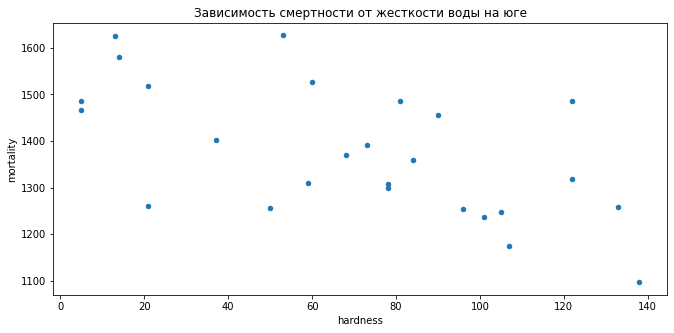

In [ ]:
south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')
#Связь определённо есть, однако распределение не такое плотное (по графику видно, что точки расположены не так близко друг к другу, как на графике обычного df)

In [ ]:
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
X = south[['hardness']]
y = south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.07466127])

In [ ]:
model.intercept_

1595.4337548999538

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [ ]:
res_south = X_test.copy()

res_south['y_pred'] = y_pred
res_south['y_test'] = y_test
res_south

,hardness,y_pred,y_test
18,122,1220.325080,1318
38,5,1580.060449,1486
0,105,1272.594322,1247
58,122,1220.325080,1486
27,37,1481.671288,1402
19,21,1530.865868,1260


In [ ]:
model.score(X_test, y_test)

-1.9300174406554644

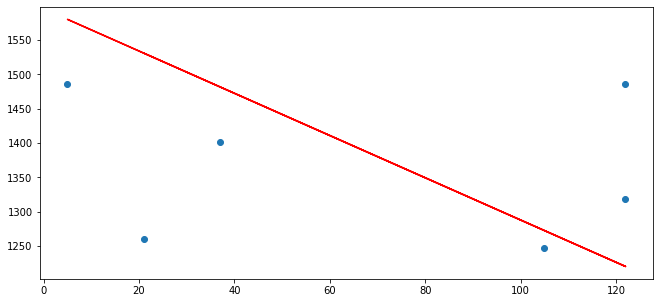

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

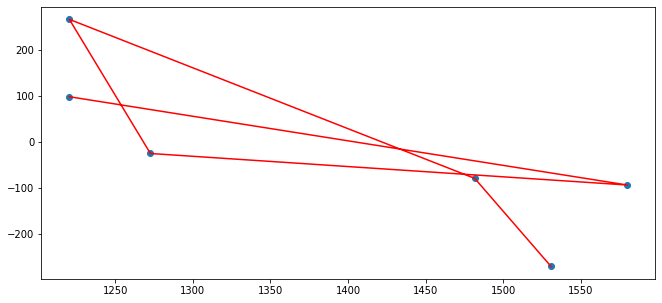

In [ ]:
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

In [ ]:
north = df[df['location'] == 'North']
north.head()

,location,town,hardness,mortality
1,North,Birkenhead,17,1668
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
5,North,Bolton,10,1558
6,North,Bootle,15,1807


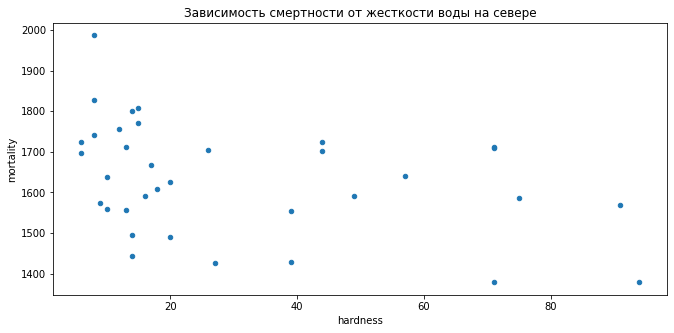

In [ ]:
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

In [ ]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
X = north[['hardness']]
y = north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-2.25038888])

In [ ]:
model.intercept_

1694.905301402942

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [ ]:
res_north = X_test.copy()

res_north['y_pred'] = y_pred
res_north['y_test'] = y_test
res_north

,hardness,y_pred,y_test
45,8,1676.902190,1987
23,9,1674.651801,1574
43,14,1663.399857,1444
36,6,1681.402968,1724
26,16,1658.899079,1591
50,71,1535.127691,1713
31,44,1595.888191,1702


In [ ]:
model.score(X_test, y_test)

-0.18101539518829401

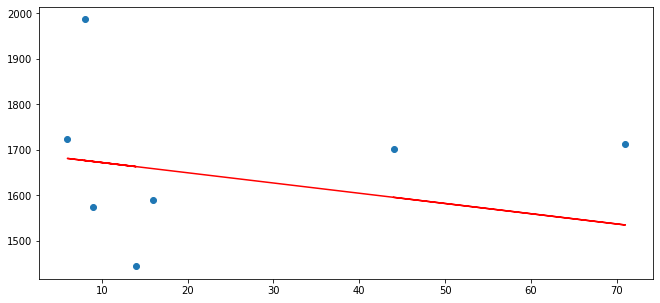

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

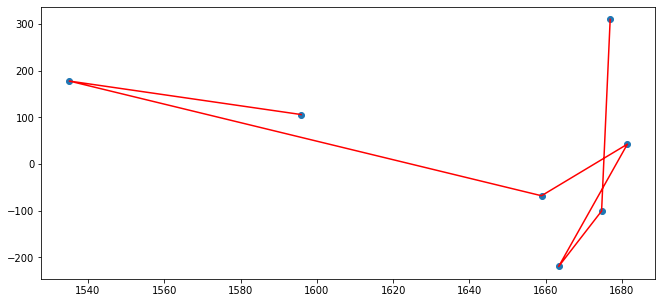

In [ ]:
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

В разделенных данных, на юг и север, наблюдается меньшая плотность распределения величин, коэфф-ты корреляции (особенно север) уменьшились, значения коэфф-в детерминации стали с отрицательными значениями, соответственно и качество моделей ухудшилось (по сравнению с моделью, построенной на данных до разбивки на север и юг).